In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', None)
import numpy as np
from collections import Counter
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 6.5}
matplotlib.rc('font', **font)
import string
from scipy.stats import mannwhitneyu

In [48]:
df = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')
# Replace True/False to Yes/No
# Snippet: https://stackoverflow.com/a/45196807
bool_cols = df.columns[df.dtypes == 'bool']
df[bool_cols] = df[bool_cols].replace({True: 'Yes', False: 'No'})
df['PaperType'] = df['PaperType'].replace({'J': 'Jor.', 'C': 'Con.'})

# cutoff
cutoff_year = 2020
df = df[df['Year'] <= cutoff_year]

In [49]:
df.head()

,Conference,Year,Title,DOI,FirstPage,LastPage,PaperType,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Venue Name,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Concepts,Number of Citations,Number of Authors,Cross-type Collaboration,Cross-country Collaboration,With US Authors,Both Cross-type and Cross-country Collaboration,IEEE Title,Citation Counts on Google Scholar,Award,Award Name,Award Track
0,InfoVis,2011,D³ Data-Driven Documents,10.1109/TVCG.2011.185,2301.0,2309,Jor.,2011,2011-12-01,W2135415614,IEEE Transactions on Visualization and Compute...,2301.0,2309.0,9.0,27,15,2239,3.0,No,No,Yes,No,D³ Data-Driven Documents,3597,No,NaN,NaN
1,Vis,1991,Tree-maps: a space-filling approach to the vis...,10.1109/VISUAL.1991.175815,284.0,291,Con.,1991,1991-10-22,W2146872957,ieee visualization,284.0,291.0,8.0,21,13,1116,2.0,No,No,Yes,No,Tree-maps: a space-filling approach to the vis...,2193,No,NaN,NaN
2,Vis,1990,Parallel coordinates: a tool for visualizing m...,10.1109/VISUAL.1990.146402,361.0,378,Con.,1990,1990-10-23,W2034694694,ieee visualization,361.0,378.0,18.0,20,16,990,2.0,No,No,Yes,No,Parallel coordinates: a tool for visualizing m...,1704,No,NaN,NaN
3,InfoVis,2006,Hierarchical Edge Bundles: Visualization of Ad...,10.1109/TVCG.2006.147,741.0,748,Jor.,2006,2006-09-01,W2145640629,IEEE Transactions on Visualization and Compute...,741.0,748.0,8.0,32,11,807,1.0,No,No,No,No,Hierarchical Edge Bundles: Visualization of Ad...,1366,Yes,BP,InfoVis
4,Vis,1997,ROAMing terrain: Real-time Optimally Adapting ...,10.1109/VISUAL.1997.663860,81.0,88,Con.,1997,1997-10-01,W2532506824,ieee visualization,81.0,88.0,8.0,20,12,585,6.0,No,No,Yes,No,ROAMing terrain: Real-time Optimally Adapting ...,1408,No,NaN,NaN


In [50]:
citenum = 'Number of Citations'
gcitenum = 'Citation Counts on Google Scholar'

In [51]:
df[df['Award'].isin(['No', 'Con.'])].head()

,Conference,Year,Title,DOI,FirstPage,LastPage,PaperType,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Venue Name,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Concepts,Number of Citations,Number of Authors,Cross-type Collaboration,Cross-country Collaboration,With US Authors,Both Cross-type and Cross-country Collaboration,IEEE Title,Citation Counts on Google Scholar,Award,Award Name,Award Track
0,InfoVis,2011,D³ Data-Driven Documents,10.1109/TVCG.2011.185,2301.0,2309,Jor.,2011,2011-12-01,W2135415614,IEEE Transactions on Visualization and Compute...,2301.0,2309.0,9.0,27,15,2239,3.0,No,No,Yes,No,D³ Data-Driven Documents,3597,No,NaN,NaN
1,Vis,1991,Tree-maps: a space-filling approach to the vis...,10.1109/VISUAL.1991.175815,284.0,291,Con.,1991,1991-10-22,W2146872957,ieee visualization,284.0,291.0,8.0,21,13,1116,2.0,No,No,Yes,No,Tree-maps: a space-filling approach to the vis...,2193,No,NaN,NaN
2,Vis,1990,Parallel coordinates: a tool for visualizing m...,10.1109/VISUAL.1990.146402,361.0,378,Con.,1990,1990-10-23,W2034694694,ieee visualization,361.0,378.0,18.0,20,16,990,2.0,No,No,Yes,No,Parallel coordinates: a tool for visualizing m...,1704,No,NaN,NaN
4,Vis,1997,ROAMing terrain: Real-time Optimally Adapting ...,10.1109/VISUAL.1997.663860,81.0,88,Con.,1997,1997-10-01,W2532506824,ieee visualization,81.0,88.0,8.0,20,12,585,6.0,No,No,Yes,No,ROAMing terrain: Real-time Optimally Adapting ...,1408,No,NaN,NaN
5,Vis,2003,Acceleration techniques for GPU-based volume r...,10.1109/VISUAL.2003.1250384,287.0,292,Con.,2003,2003-10-22,W2113001609,ieee visualization,38.0,38.0,1.0,17,16,607,2.0,No,No,No,No,Acceleration techniques for GPU-based volume r...,1289,No,NaN,NaN


## Plot boxplots with stripplots

In [52]:
vars = ['Cross-type Collaboration', 'Cross-country Collaboration',
       'With US Authors', 'Award', 'PaperType']
short_varname_dic = {
    'Cross-type Collaboration':'Cross-type',
    'Cross-country Collaboration':'Cross-country',
    'With US Authors':'W/ US Authors'
}

In [53]:
'Cross-type Collaboration' in short_varname_dic.keys()

True

array([252., 252.])

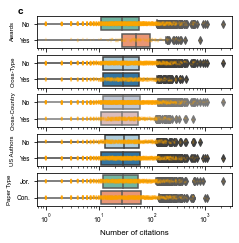

In [56]:
# THE FOLLOWING IS FOR THE REPLICABILITY STAMP
smallfontsize = 6
f, axs = plt.subplots(5,1,
                      figsize=(3.5,3.5),
                      sharex=True,
                      sharey=False,
                      gridspec_kw=dict(height_ratios=[1,1,1,1,1]))
g0 = sns.boxplot(x=df[citenum], y=df['Award'].astype(str), palette="Set2", ax=axs[0])
g0 = sns.stripplot(x=df[citenum], y=df['Award'].astype(str), 
              size=2, color="orange", linewidth=0, ax=axs[0], alpha=0.2)
g0.set_xlabel("")
g0.set_ylabel("Awards", fontsize = smallfontsize)
###########
g1 = sns.boxplot(x=df[citenum], 
                 y=df['Cross-type Collaboration'].astype(str), palette="Paired", ax=axs[1])
g1 = sns.stripplot(x=df[citenum], y=df['Cross-type Collaboration'].astype(str), 
              size=2, color="orange", linewidth=0, ax=axs[1], alpha=0.2)
g1.set_xlabel("")
g1.set_ylabel("Cross-Type", fontsize = smallfontsize)
#############
g2 = sns.boxplot(x=df[citenum], 
                 y=df['Cross-country Collaboration'].astype(str), palette="vlag", ax=axs[2])
g2 = sns.stripplot(x=df[citenum], y=df['Cross-country Collaboration'].astype(str),
                   size=2, color="orange", linewidth=0, ax=axs[2], alpha=.2)
g2.set_xlabel("")
g2.set_ylabel("Cross-Country", fontsize = smallfontsize)
################
g3 = sns.boxplot(x=df[citenum], 
                 y=df['With US Authors'].astype(str), 
                 palette="Paired", 
                 ax=axs[3],
                 order = ['No', 'Yes'],  
                )
g3 = sns.stripplot(x=df[citenum], y=df['With US Authors'].astype(str), 
                   order = ['No', 'Yes'], 
              size=2, color="orange", linewidth=0, ax=axs[3], alpha=0.2)
g3.set_xlabel("")
g3.set_ylabel("US Authors", fontsize = smallfontsize)
##################
g4 = sns.boxplot(x=citenum, y='PaperType', data=df, palette="Set2", ax=axs[4])
g4 = sns.stripplot(x=citenum, y='PaperType', data=df,
              size=2, color="orange", linewidth=0, ax=axs[4], alpha=0.2)
g4.set_xlabel('Number of citations', fontsize = 8)
g4.set_xscale("log")
g4.set_ylabel("Paper Type", fontsize = smallfontsize)
f.text(-0.1, 1.05, 'c', transform=g0.transAxes, 
            size=10, weight='bold')
# f.tight_layout()
f.savefig('../results/figures/boxplots_replicability.png', dpi = 150)
f.get_size_inches()*f.dpi